In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tensorflow.keras.models import Model, load_model

In [2]:
IMG_SHAPE = (28,28)
model_path = 'Deblurring_CNN.h5'
model = load_model(model_path)

2022-09-27 23:32:42.077938: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-27 23:32:42.759071: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-27 23:32:42.759637: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-27 23:32:42.906278: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [15]:
def generate_blurred_img(img_set):
	n = img_set.shape[0]
	blurred_img_set = img_set.copy()
	for i in range(n):
		blurred_img_set[i] = cv2.medianBlur(img_set[i], 5)

	return blurred_img_set

In [16]:
def prepareTestDataset(path):
    imgs = []
    for file in os.listdir(path):
        img = plt.imread(path+file)
        img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        img = cv2.resize(img,IMG_SHAPE)
        imgs.append(img)
    
    testY = np.array(imgs)
    testX = generate_blurred_img(testY)
    testY = np.expand_dims(testY,axis=3)
    testX = np.expand_dims(testX,axis=3)
    print("testX shape: ",testX.shape)
    return testX,testY

In [17]:
path = 'testdata/'
testX,testY = prepareTestDataset(path)

testX shape:  (9, 28, 28, 1)


In [24]:
def plot_img(img_set, title_set, fig_path = 'outputs'):
	plt.figure(figsize = (5, 5))
	plt.rcParams['font.size'] = 4
	n = len(img_set)
	k = 1
	for i in range(n):
		for j in range(3):
			plt.subplot(n, 3, k)
			plt.imshow(img_set[i][j], cmap = 'gray')
			plt.axis('off')
			plt.title(title_set[i])
			k += 1

	if (fig_path != ''):
		plt.savefig(fig_path)
	plt.show()

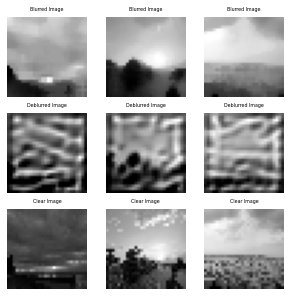

In [25]:
output = model.predict(testX)

img_set = [testX[:3, :, :, 0], output[:3, :, :, 0], testY[:3, :, :, 0]]
title_set = ['Blurred Image', 'Deblurred Image', 'Clear Image']
plot_img(img_set,title_set)
	